# Example Fusion IDLab

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

def show_image(image_path, figsize=(8,8)):
    img_pil = Image.open(image_path)
    fig, ax = plt.subplots(figsize=figsize)
    ax.imshow(np.array(img_pil).astype(np.uint8))
    ax.grid(False)
    plt.show()

def create_output_image_path(input_image_path, output_folder, method, output_type="heatmap"):
    # Extract the filename from the input image path
    input_image_name = os.path.basename(input_image_path)

    # Construct the output image path
    output_image_name = f"{input_image_name}_{method}_{output_type}.png"
    output_image_path = os.path.join(output_folder, output_image_name)

    return output_image_path

## Run individual methods

In [2]:
output_folder = "./examples_output"

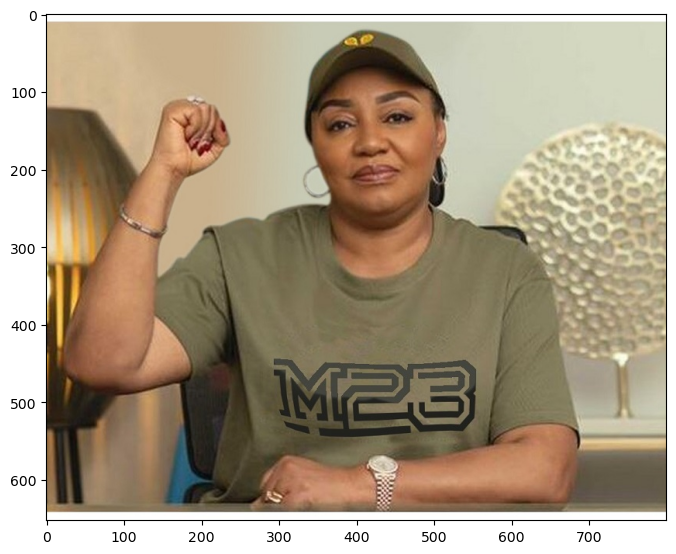

In [3]:
input_image_path = "./examples_input/denise_m23.jpg"
show_image(input_image_path)

In [15]:
import forgery_detection

In [4]:
# ADQ1
output_image_path_adq1 = create_output_image_path(input_image_path, output_folder, "ADQ1")

In [17]:
forgery_detection.adq1(input_image_path, output_image_path_adq1)

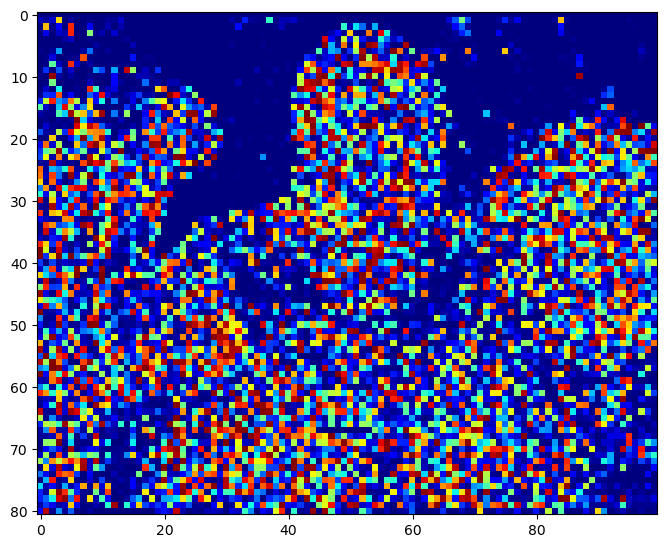

In [5]:
show_image(output_image_path_adq1)

In [6]:
# BLK
output_image_path_blk = create_output_image_path(input_image_path, output_folder, "BLK")

In [20]:
forgery_detection.blk(input_image_path, output_image_path_blk)

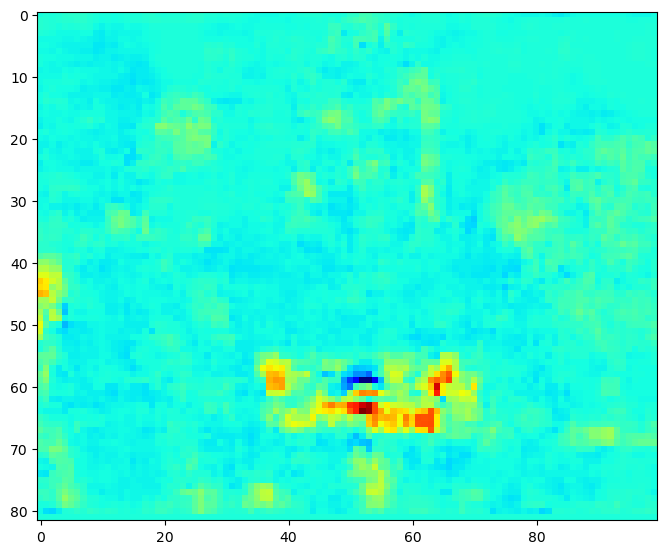

In [7]:
show_image(output_image_path_blk)

In [8]:
# DCT
output_image_path_dct = create_output_image_path(input_image_path, output_folder, "DCT")

In [23]:
forgery_detection.dct(input_image_path, output_image_path_dct)

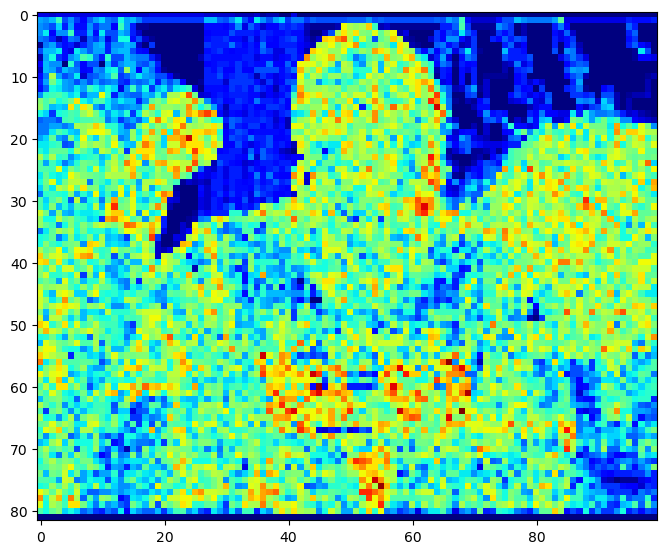

In [9]:
show_image(output_image_path_dct)

In [10]:
# CAGI
output_image_path_cagi = create_output_image_path(input_image_path, output_folder, "CAGI")

In [26]:
forgery_detection.cagi(input_image_path, output_image_path_cagi)

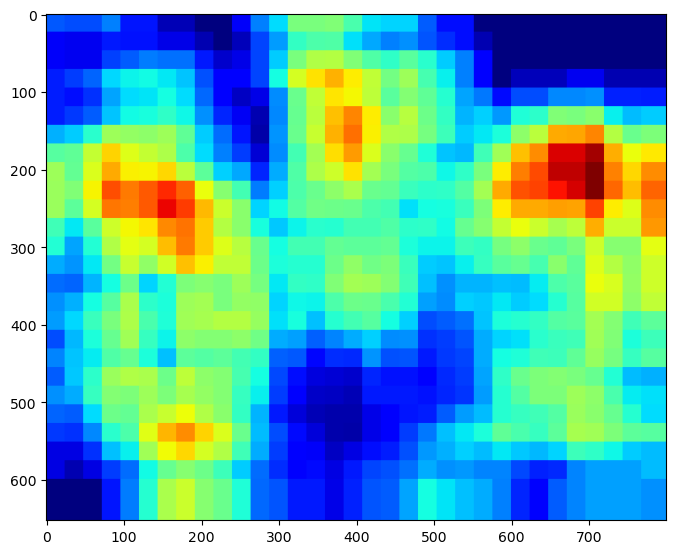

In [11]:
show_image(output_image_path_cagi)

In [4]:
# Requires Tensorflow & Comprint repository
import forgery_detection_comprint_noiseprint

2024-02-27 13:35:44.766363: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 13:35:44.766484: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 13:35:44.770243: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 13:35:44.786248: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 13:35:47.349679: W tensorflow/comp

In [12]:
output_file_heatmap_path_noiseprint = create_output_image_path(input_image_path, output_folder, "Noiseprint", output_type="heatmap")
output_file_fingerprint_path_noiseprint = create_output_image_path(input_image_path, output_folder, "Noiseprint", output_type="fingerprint")

In [5]:
noiseprint_model_path = "./comprint/models/noiseprint_nets/net"
forgery_detection_comprint_noiseprint.noiseprint(input_image_path, output_file_fingerprint_path_noiseprint, output_file_heatmap_path_noiseprint, noiseprint_model_path)

INFO:tensorflow:Restoring parameters from ./comprint/models/noiseprint_nets/net_jpg101/model


2024-02-27 13:35:52.632777: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10532 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:af:00.0, compute capability: 6.1
2024-02-27 13:35:52.655089: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled


 653x800 small 101


2024-02-27 13:35:53.944559: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904


Fingerprint extracted in 3.26 sec.
Heatmap extracted in 17.69 sec.


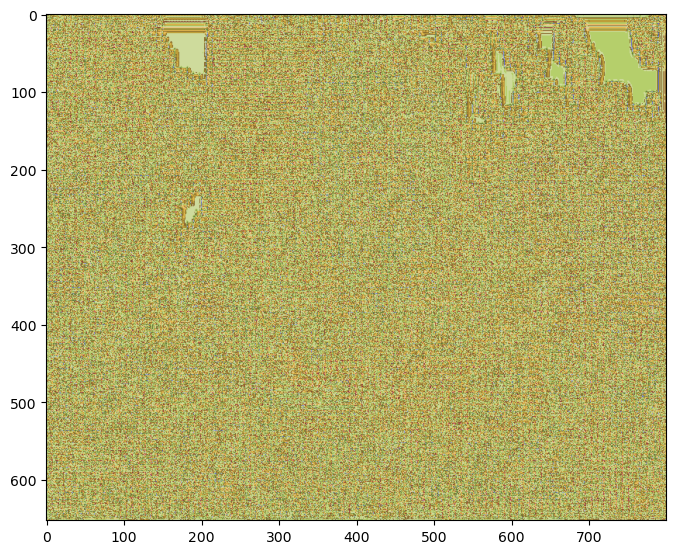

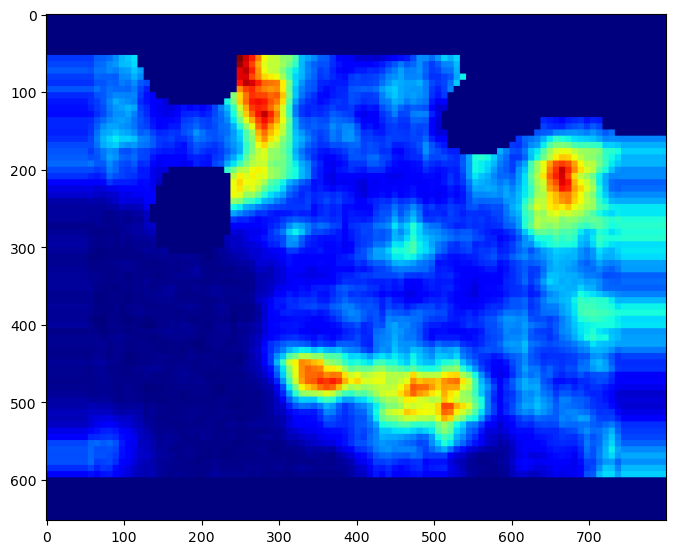

In [13]:
show_image(output_file_fingerprint_path_noiseprint)
show_image(output_file_heatmap_path_noiseprint)

In [14]:
output_file_heatmap_path_comprint = create_output_image_path(input_image_path, output_folder, "Comprint", output_type="heatmap")
output_file_fingerprint_path_comprint = create_output_image_path(input_image_path, output_folder, "Comprint", output_type="fingerprint")

In [12]:
comprint_model_path = "./comprint/models/Comprint_Siamese_Full_jpg_ps_full/"
forgery_detection_comprint_noiseprint.comprint(input_image_path, output_file_fingerprint_path_noiseprint, output_file_heatmap_path_comprint, comprint_model_path)

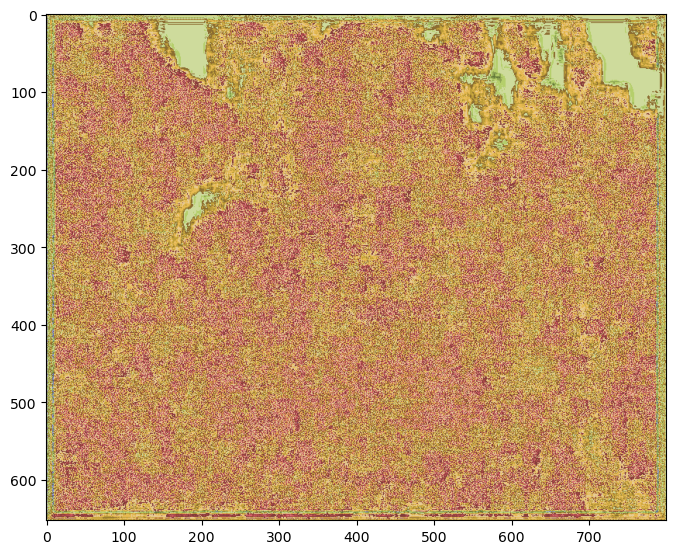

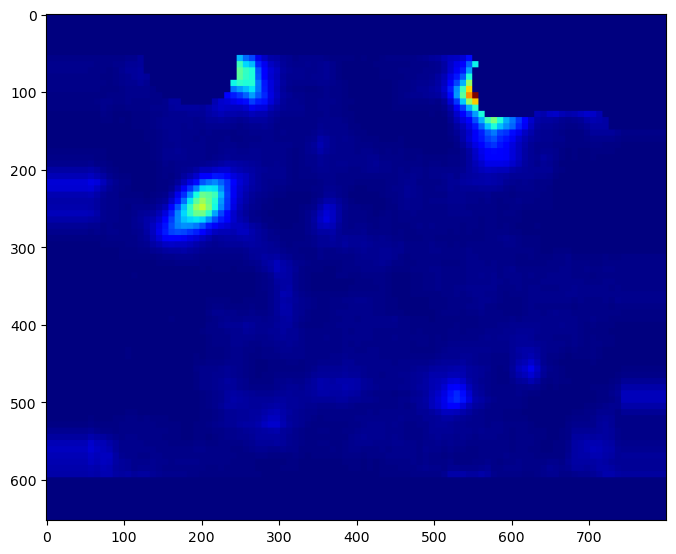

In [15]:
show_image(output_file_fingerprint_path_comprint)
show_image(output_file_heatmap_path_comprint)

In [16]:
output_file_heatmap_path_comprint_plus_noisprint = create_output_image_path(input_image_path, output_folder, "Comprint+Noiseprint", output_type="heatmap")

In [14]:
# By first running Noiseprint and Comprint above, the fingerprint (comprint & noiseprint) files have been created as npz
forgery_detection_comprint_noiseprint.comprint_plus_noiseprint(input_image_path, output_file_fingerprint_path_comprint, output_file_fingerprint_path_noiseprint, output_file_heatmap_path_comprint_plus_noisprint)

Heatmap extracted in 20.10 sec.


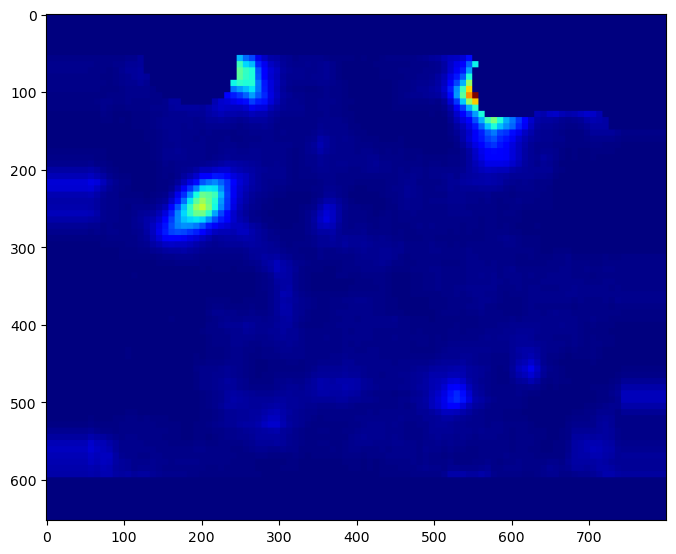

In [17]:
show_image(output_file_heatmap_path_comprint_plus_noisprint)

In [38]:
# Requires torch & CAT-Net repository
# Also run ./download_weights from the ./CAT-Net repository
import forgery_detection_catnet

In [18]:
output_file_heatmap_path_catnet = create_output_image_path(input_image_path, output_folder, "CATNet")
catnet_modelpath = "./CAT-Net/output/splicing_dataset/CAT_full/CAT_full_v2.pth.tar"

In [40]:
forgery_detection_catnet.catnet(input_image_path, output_file_heatmap_path_catnet, catnet_modelpath)

=> loading model from ./CAT-Net/output/splicing_dataset/CAT_full/CAT_full_v2.pth.tar


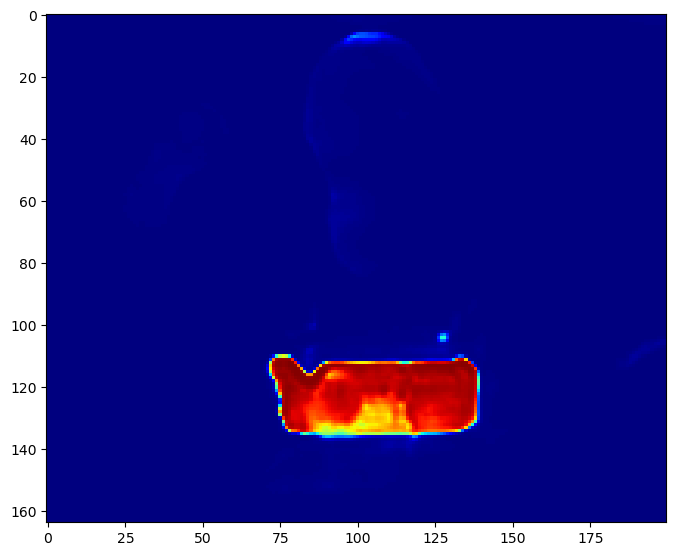

In [19]:
show_image(output_file_heatmap_path_catnet)

## Run Fusion IDLab

In [20]:
# Requires tensorflow
import forgery_detection_fusion_idlab

2024-02-27 14:37:25.646020: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 14:37:25.646083: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 14:37:25.647696: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 14:37:25.658696: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 14:37:26.871085: W tensorflow/compiler/tf2

In [24]:
output_file_heatmap_path_fusion_idlab = create_output_image_path(input_image_path, output_folder, "FusionIDLab")

In [30]:
# This assumes all previous forgery detection methods have been run before, and the corresponding npz files are available
fusion_idlab_model = "./models/training_checkpoints_faceswap+imd2020+openforensics_balanced_all_methods_just_heatmaps+original_image_l2_batch1_40epochs_v11_only_latest"
forgery_detection_fusion_idlab.run_fusion_idlab(
    input_image_path,
    output_file_heatmap_path_catnet,
    output_file_heatmap_path_comprint_plus_noisprint,
    output_image_path_adq1,
    output_image_path_blk,
    output_image_path_dct,
    output_image_path_cagi,
    output_file_heatmap_path_comprint,
    output_file_heatmap_path_noiseprint,
    output_file_heatmap_path_fusion_idlab,
    fusion_idlab_model, use_gpu=True)

Heatmap extracted in 3.08 sec.


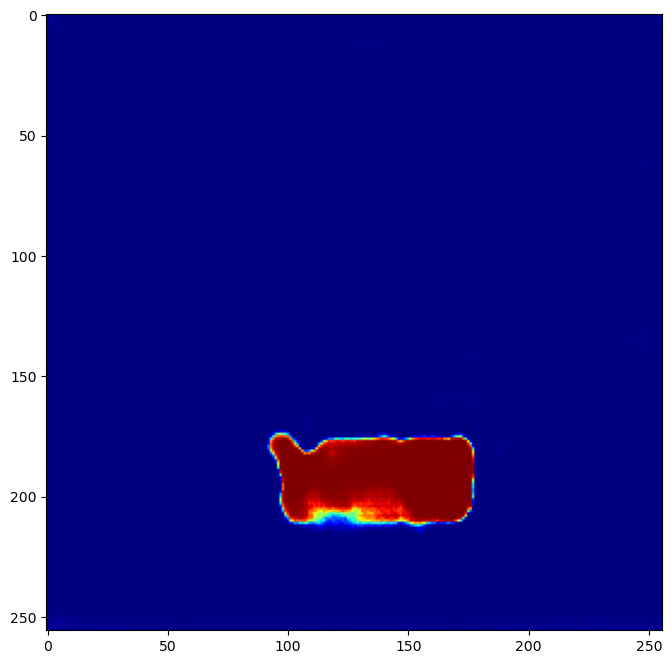

In [31]:
show_image(output_file_heatmap_path_fusion_idlab)